https://github.com/gilbutITbook/006958/blob/master/deeplearning/deep_code/03_Iris_Multi_Classfication.py

In [2]:
from keras.models import Sequential
from keras.layers.core import Dense
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy

# seed 값 설정
seed = 0
numpy.random.seed(seed)

# 데이터 입력
df = pd.read_csv('C:/dataset/gilbut/iris.csv', names = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"])

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


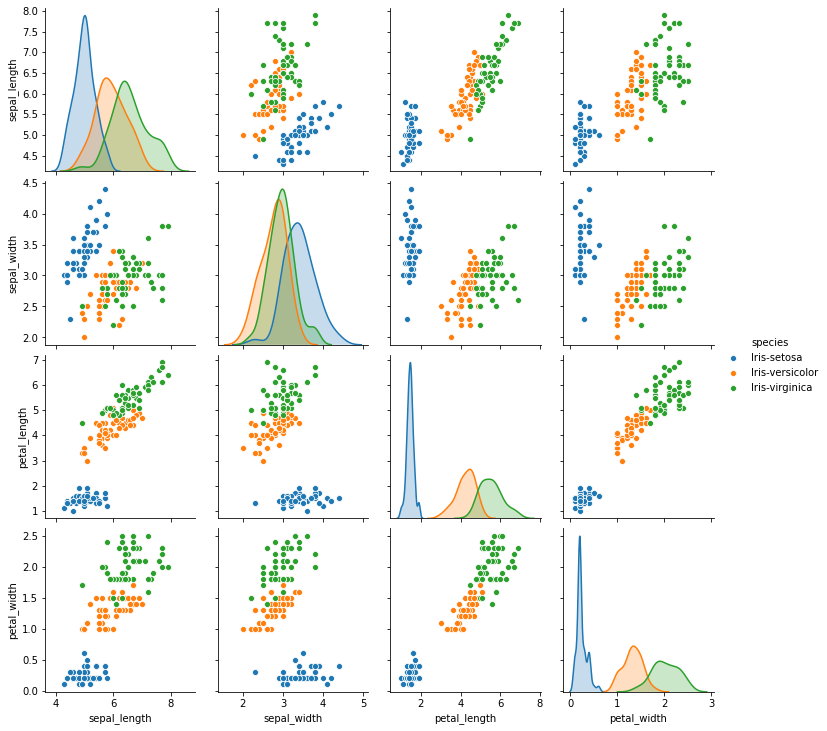

In [4]:
# 그래프로 확인
sns.pairplot(df, hue='species')
plt.show()

In [5]:
# 데이터 분류
dataset = df.values
X = dataset[:,0:4].astype(float)
Y_obj = dataset[:,4]

In [6]:
# 문자열을 숫자로 변환
e = LabelEncoder()
e.fit(Y_obj)
Y = e.transform(Y_obj)

In [7]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [9]:
Y_encoded = np_utils.to_categorical(Y)
Y_encoded

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [10]:
# 모델의 설정
model = Sequential()
model.add(Dense(16,  input_dim=4, activation='relu'))
model.add(Dense(3, activation='softmax'))

최종 출력 값이 3개 중 하나여야 하므로 출력층에 해당하는 Dense의 노드 수를 3으로 설정. 또한 활성화 함수로 소프트맥스 사용.
### 소프트맥스
- 입력 받은 값을 정규화하여 총합이 1인 형태로 바꿔서 계산해주는 함수
- 분류하고 싶은 클래스의 수만큼 출력으로 구성
- 가장 큰 출력 값을 부여받은 클래스가 확률이 가장 높은 것으로 이용됨

In [11]:
# 모델 컴파일
model.compile(loss='categorical_crossentropy',
            optimizer='adam',
            metrics=['accuracy'])

# 모델 실행
model.fit(X, Y_encoded, epochs=50, batch_size=1)

Epoch 1/50
150/150 [==============================] - 0s 2ms/step - loss: 1.2544 - accuracy: 0.4000
Epoch 2/50
150/150 [==============================] - 0s 2ms/step - loss: 0.6831 - accuracy: 0.6267
Epoch 3/50
150/150 [==============================] - 0s 2ms/step - loss: 0.5226 - accuracy: 0.8933
Epoch 4/50
150/150 [==============================] - 0s 2ms/step - loss: 0.4425 - accuracy: 0.8800
Epoch 5/50
150/150 [==============================] - 0s 2ms/step - loss: 0.4072 - accuracy: 0.9333
Epoch 6/50
150/150 [==============================] - 0s 2ms/step - loss: 0.3739 - accuracy: 0.9133
Epoch 7/50
150/150 [==============================] - 0s 2ms/step - loss: 0.3470 - accuracy: 0.9200
Epoch 8/50
150/150 [==============================] - 0s 2ms/step - loss: 0.3287 - accuracy: 0.9333
Epoch 9/50
150/150 [==============================] - 0s 2ms/step - loss: 0.3044 - accuracy: 0.9267
Epoch 10/50
150/150 [==============================] - 0s 2ms/step - loss: 0.2867 - accuracy: 0.9267

In [12]:
# 결과 출력
print("\n Accuracy: %.4f" % (model.evaluate(X, Y_encoded)[1]))

5/5 [==============================] - 0s 2ms/step - loss: 0.1020 - accuracy: 0.9600

 Accuracy: 0.9600
